# building an Image classifier

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

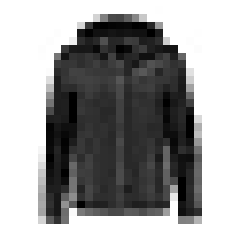

In [9]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

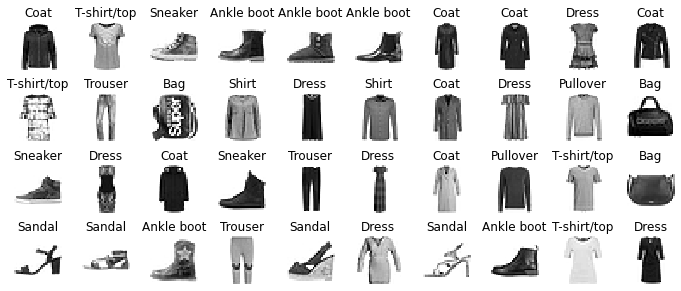

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax"),
])

In [17]:
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.01068372,  0.06065987, -0.06544198, ...,  0.02480365,
         0.06385759, -0.01683677],
       [-0.01963339,  0.0117697 ,  0.06422201, ..., -0.05497922,
         0.06599723,  0.02390179],
       [ 0.02845835,  0.04901642,  0.07149312, ..., -0.00814779,
         0.06148984, -0.05507923],
       ...,
       [-0.03281783, -0.05217583,  0.04756661, ..., -0.04284566,
         0.02503198, -0.00906333],
       [-0.06476967, -0.01510451, -0.03211158, ...,  0.04258623,
         0.06091116, -0.07078271],
       [-0.04956737,  0.03889675,  0.04186151, ...,  0.01983836,
         0.04145583,  0.05067526]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0207 - accuracy: 0.6685 - val_loss: 0.5181 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4969 - accuracy: 0.8267 - val_loss: 0.4400 - val_accuracy: 0.8530
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4444 - accuracy: 0.8459 - val_loss: 0.4599 - val_accuracy: 0.8358
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8540 - val_loss: 0.3935 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3923 - accuracy: 0.8631 - val_loss: 0.3767 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3742 - accuracy: 0.8685 - val_loss: 0.3793 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3575 - accuracy: 0.8751 - val_loss: 0.3639 - val_accuracy:

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

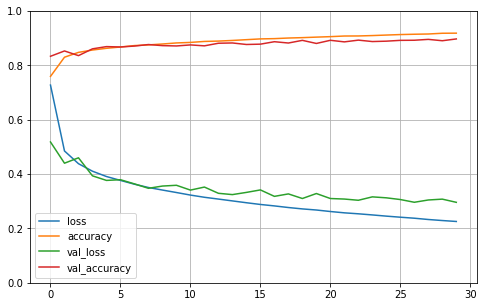

In [31]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3273 - accuracy: 0.8862


[0.3273429274559021, 0.8862000107765198]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/ken/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

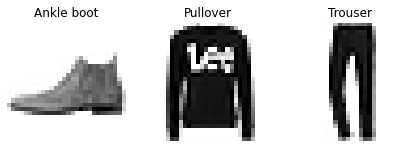

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()